In [5]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


# Couple reservoir-constrictions model

Two reservoir are coupled

use: 

Reservoir-constriction equation from eq(5a)&(5b) Covington 2012



# Question 2

h1 at equilibrium = 16.7076564038 m
h2 at equilibrium = 8.3538282019 m


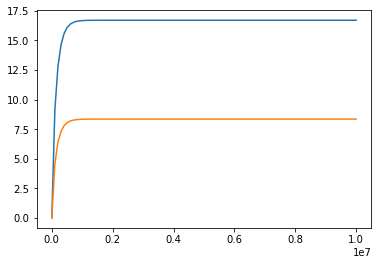

In [13]:
# 1. Derive the coupled ODEs that describe this system
########################
# D_h = small variation in waterlevel
#
#
#
#



# Define parameters
D_h1 = 1 #m
D_h2 = 1 #m
A_R1 = 5000. #m^2
A_R2 = 50. #m^2
L1 = 1000. #m
L2 = 1000.
f1 = 0.1 #unitless
f2 = 0.1
R = 1. #m^3/s
A_c1 = pi*(D_h1**2)/4.
A_c2 = pi*(D_h2**2)/4.

h=[0.,0.]

g=9.8 #m^2/s


# Question 1: Coupled equations

def dh_dt(F_h, tdummy, F_Ac1,F_Ac2, F_Dh1,F_Dh2, F_L1, F_L2, F_f1, F_f2, F_R, F_AR1, F_AR2):
    h1,h2 = F_h # what does this part do?
    Cf1 = 1. + F_f1*F_L1/F_Dh1
    Q1 = F_Ac1*sqrt(2.*g*(h1-h2)/Cf1)
    Cf2 = 1. + F_f2*F_L2/F_Dh2
    Q2 = F_Ac2*sqrt(2.*g*h2/Cf2)
    
    return ((R - Q1)/F_AR1, (Q1 - Q2)/F_AR2)



t = linspace(0,10000000,100)
resultat = odeint(dh_dt,h, t, args=(A_c1, A_c2, D_h1, D_h2, L1, L2, f1, f2, R, A_R1, A_R2))

h1_eq = resultat [-1,0]
h2_eq = resultat [-1,1]


plot(t,resultat[:,0])
plot(t,resultat[:,1])


print 'h1 at equilibrium =', h1_eq ,'m'
print 'h2 at equilibrium =', h2_eq ,'m'

# Question 3: the recharge fluctuate

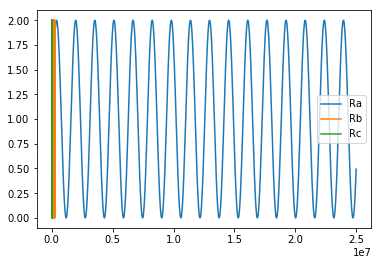

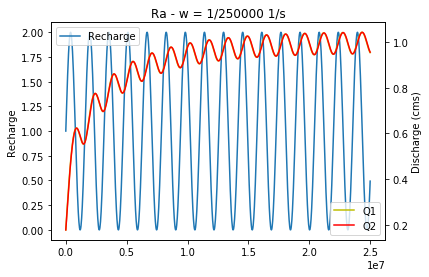

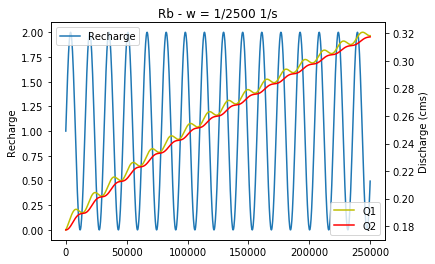

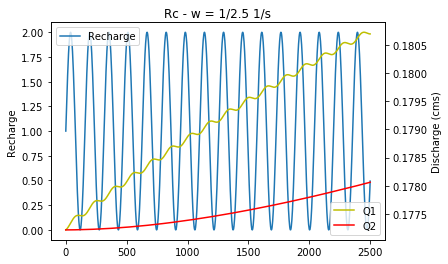

In [14]:
# Question 3: the recharge fluctuate

    
g=9.8 #m^2/s

# Define parameters
D_h1 = 0.5 #m
D_h2 = 0.5 #m
A_R1 = 5000. #m^2
A_R2 = 50. #m^2
#A_R1 = 50. #m^2
#A_R2 = 5000. #m^2
L1 = 1000. #m
L2 = 1000.
f1 = 0.1 #unitless
f2 = 0.1
# R = 1. #m^3/s
A_c1 = pi*(D_h1**2)/4.
A_c2 = pi*(D_h2**2)/4.

C_f1 = 1. + f1*L1/D_h1
C_f2 = 1. + f2*L2/D_h2

wa=4*10**-6 # /s
wb=4*10**-4 # /s
wc=4*10**-2 # /s

h=[0.,0.]
heq=[h1_eq,h2_eq]




def dh_dt_R(F_h, time, F_Ac1,F_Ac2, F_Cf1, F_Cf2, F_AR1, F_AR2, F_w):
    fh1,fh2 = F_h 
    fR_t = sin(F_w*time)+1.    
    fQ1 = F_Ac1*sqrt(2.*g*abs(fh1-fh2)/F_Cf1)
    fQ2 = F_Ac2*sqrt(2.*g*abs(fh2)/F_Cf2)
    
    return ((fR_t - fQ1)/F_AR1, (fQ1 - fQ2)/F_AR2)

#t = linspace(0,10000000,100000) # time at which we want the solution


# Define timestep
tstepa = 1000
tstepb = 1000
tstepc = 1000

Pa = 1./wa
Pb = 1./wb
Pc = 1./wc

ta = linspace(0,(100.*Pa),tstepa)
tb = linspace(0,(100.*Pb),tstepb)
tc = linspace(0,(100.*Pc),tstepc)



resultata = odeint(dh_dt_R, heq, ta, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wa))
resultatb = odeint(dh_dt_R, heq, tb, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wb))
resultatc = odeint(dh_dt_R, heq, tc, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wc))


h1a=resultata[:,0]
h2a=resultata[:,1]
h1b=resultatb[:,0]
h2b=resultatb[:,1]
h1c=resultatc[:,0]
h2c=resultatc[:,1]

Q1a = A_c1*sqrt(2.*g*abs(h1a-h2a)/C_f1)
Q2a = A_c2*sqrt(2.*g*abs(h2a)/C_f2)
Ra = sin(wa*ta)+1.

Q1b = A_c1*sqrt(2.*g*abs(h1b-h2b)/C_f1)
Q2b = A_c2*sqrt(2.*g*abs(h2b)/C_f2)
Rb = sin(wb*tb)+1.

Q1c = A_c1*sqrt(2.*g*abs(h1c-h2c)/C_f1)
Q2c = A_c2*sqrt(2.*g*abs(h2c)/C_f2)
Rc = sin(wc*tc)+1.


plot(ta, Ra)
plot(tb, Rb)
plot(tc, Rc)
legend(['Ra', 'Rb', 'Rc'])
show()

###############
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
title('Ra - w = 1/250000 1/s')

ax1.plot(ta, Ra, label = 'Recharge')
ax2.plot(ta, Q1a, label = "Q1", color='y')
ax2.plot(ta, Q2a, label = "Q2", color='r')


ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')


ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')


#################
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
title('Rb - w = 1/2500 1/s')

ax1.plot(tb, Rb, label = 'Recharge')
ax2.plot(tb, Q1b, label = "Q1", color='y')
ax2.plot(tb, Q2b, label = "Q2", color='r')

ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')

ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')

#################
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
title('Rc - w = 1/2.5 1/s')
ylabel('seconds')
ax1.plot(tc, Rc, label = 'Recharge')
ax2.plot(tc, Q1c, label = "Q1", color='y')
ax2.plot(tc, Q2c, label = "Q2", color='r')


ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')

ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')

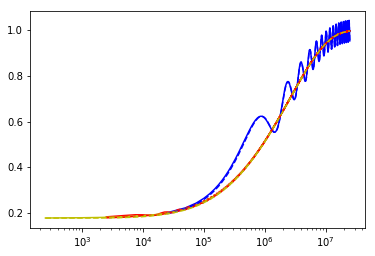

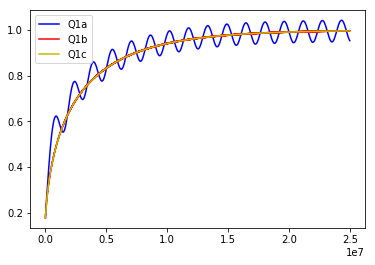

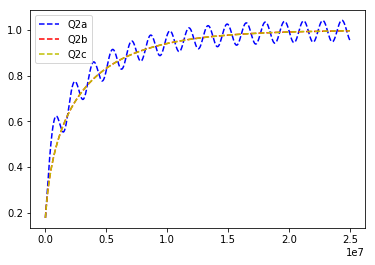

In [15]:
#t = linspace(0,10000000,100000) # time at which we want the solution
Pa = 1./wa
Pb = 1./wb
Pc = 1./wc

# Define timestep
tstepa = 1000
tstepb = 10000
tstepc = 100000
ta = linspace(0,(100.*Pa),tstepa)
tb = linspace(0,(10000.*Pb),tstepb)
tc = linspace(0,(1000000.*Pc),tstepc)


resultata = odeint(dh_dt_R, heq, ta, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wa))
resultatb = odeint(dh_dt_R, heq, tb, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wb))
resultatc = odeint(dh_dt_R, heq, tc, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wc))


h1a=resultata[:,0]
h2a=resultata[:,1]
h1b=resultatb[:,0]
h2b=resultatb[:,1]
h1c=resultatc[:,0]
h2c=resultatc[:,1]

Q1a = A_c1*sqrt(2.*g*abs(h1a-h2a)/C_f1)
Q2a = A_c2*sqrt(2.*g*abs(h2a)/C_f2)
Ra = sin(wa*ta)+1.

Q1b = A_c1*sqrt(2.*g*abs(h1b-h2b)/C_f1)
Q2b = A_c2*sqrt(2.*g*abs(h2b)/C_f2)
Rb = sin(wb*tb)+1.

Q1c = A_c1*sqrt(2.*g*abs(h1c-h2c)/C_f1)
Q2c = A_c2*sqrt(2.*g*abs(h2c)/C_f2)
Rc = sin(wc*tc)+1.



semilogx(ta,Q1a,'b')
semilogx(tb,Q1b,'r')
semilogx(tc,Q1c,'y')
semilogx(ta,Q2a,'--b')
semilogx(tb,Q2b,'--r')
semilogx(tc,Q2c,'--y')
show()

plot(ta,Q1a,'b')
plot(tb,Q1b,'r')
plot(tc,Q1c,'y')
legend(['Q1a','Q1b','Q1c'])
show()
plot(ta,Q2a,'--b')
plot(tb,Q2b,'--r')
plot(tc,Q2c,'--y')
legend(['Q2a','Q2b','Q2c'])
show()



# Question 3: inversion of the reservoir

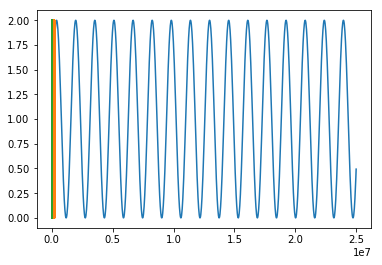

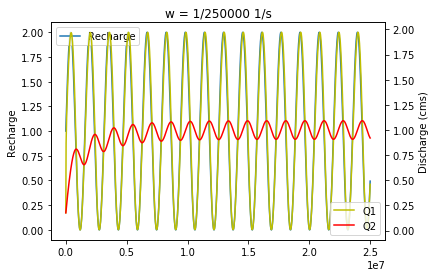

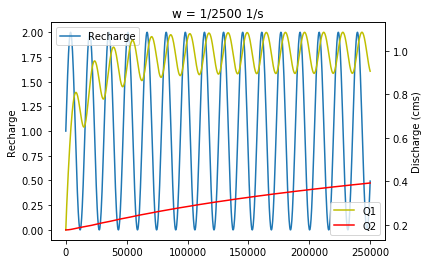

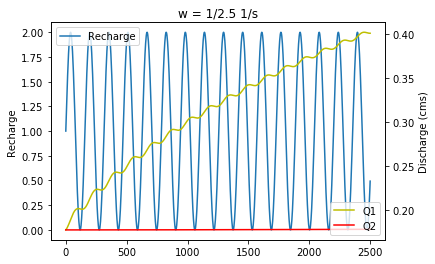

In [16]:
# Question 3: inversion of the reservoir

    
g=9.8 #m^2/s

# Define parameters
D_h1 = 0.5 #m
D_h2 = 0.5 #m
#A_R1 = 5000. #m^2
#A_R2 = 50. #m^2
A_R1 = 50. #m^2
A_R2 = 5000. #m^2
L1 = 1000. #m
L2 = 1000.
f1 = 0.1 #unitless
f2 = 0.1
# R = 1. #m^3/s
A_c1 = pi*(D_h1**2)/4.
A_c2 = pi*(D_h2**2)/4.

C_f1 = 1. + f1*L1/D_h1
C_f2 = 1. + f2*L2/D_h2

wa=4*10**-6 # /s
wb=4*10**-4 # /s
wc=4*10**-2 # /s

h=[0.,0.]
heq=[h1_eq,h2_eq]




def dh_dt_R(F_h, time, F_Ac1,F_Ac2, F_Cf1, F_Cf2, F_AR1, F_AR2, F_w):
    fh1,fh2 = F_h 
    fR_t = sin(F_w*time)+1.    
    fQ1 = F_Ac1*sqrt(2.*g*abs(fh1-fh2)/F_Cf1)
    fQ2 = F_Ac2*sqrt(2.*g*abs(fh2)/F_Cf2)
    
    return ((fR_t - fQ1)/F_AR1, (fQ1 - fQ2)/F_AR2)

#t = linspace(0,10000000,100000) # time at which we want the solution


# Define timestep
tstepa = 1000
tstepb = 1000
tstepc = 1000
ta = linspace(0,(100.*Pa),tstepa)
tb = linspace(0,(100.*Pb),tstepb)
tc = linspace(0,(100.*Pc),tstepc)
Pa = 1./wa
Pb = 1./wb
Pc = 1./wc


resultata = odeint(dh_dt_R, heq, ta, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wa))
resultatb = odeint(dh_dt_R, heq, tb, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wb))
resultatc = odeint(dh_dt_R, heq, tc, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wc))


h1a=resultata[:,0]
h2a=resultata[:,1]
h1b=resultatb[:,0]
h2b=resultatb[:,1]
h1c=resultatc[:,0]
h2c=resultatc[:,1]

Q1a = A_c1*sqrt(2.*g*abs(h1a-h2a)/C_f1)
Q2a = A_c2*sqrt(2.*g*abs(h2a)/C_f2)
Ra = sin(wa*ta)+1.

Q1b = A_c1*sqrt(2.*g*abs(h1b-h2b)/C_f1)
Q2b = A_c2*sqrt(2.*g*abs(h2b)/C_f2)
Rb = sin(wb*tb)+1.

Q1c = A_c1*sqrt(2.*g*abs(h1c-h2c)/C_f1)
Q2c = A_c2*sqrt(2.*g*abs(h2c)/C_f2)
Rc = sin(wc*tc)+1.


plot(ta, Ra)
plot(tb, Rb)
plot(tc, Rc)
show()

###############
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
title('w = 1/250000 1/s')

ax1.plot(ta, Ra, label = 'Recharge')
ax2.plot(ta, Q1a, label = "Q1", color='y')
ax2.plot(ta, Q2a, label = "Q2", color='r')


ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')


ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')


#################
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
title('w = 1/2500 1/s')

ax1.plot(tb, Rb, label = 'Recharge')
ax2.plot(tb, Q1b, label = "Q1", color='y')
ax2.plot(tb, Q2b, label = "Q2", color='r')

ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')

ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')

#################
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
title('w = 1/2.5 1/s')
ylabel('seconds')
ax1.plot(tc, Rc, label = 'Recharge')
ax2.plot(tc, Q1c, label = "Q1", color='y')
ax2.plot(tc, Q2c, label = "Q2", color='r')


ax1.set_ylabel('Recharge')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Discharge (cms)')

ax1.legend(loc ='upper left')
ax2.legend(loc ='lower right')

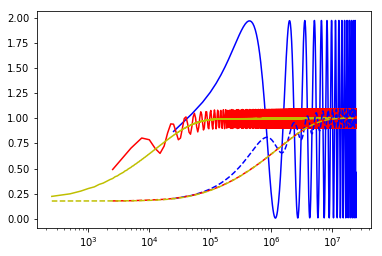

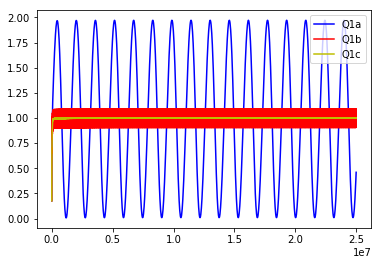

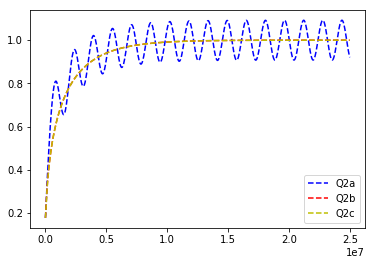

In [17]:
#t = linspace(0,10000000,100000) # time at which we want the solution
Pa = 1./wa
Pb = 1./wb
Pc = 1./wc

# Define timestep
tstepa = 1000
tstepb = 10000
tstepc = 100000
ta = linspace(0,(100.*Pa),tstepa)
tb = linspace(0,(10000.*Pb),tstepb)
tc = linspace(0,(1000000.*Pc),tstepc)


resultata = odeint(dh_dt_R, heq, ta, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wa))
resultatb = odeint(dh_dt_R, heq, tb, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wb))
resultatc = odeint(dh_dt_R, heq, tc, args=(A_c1,A_c2, C_f1, C_f2, A_R1, A_R2, wc))


h1a=resultata[:,0]
h2a=resultata[:,1]
h1b=resultatb[:,0]
h2b=resultatb[:,1]
h1c=resultatc[:,0]
h2c=resultatc[:,1]

Q1a = A_c1*sqrt(2.*g*abs(h1a-h2a)/C_f1)
Q2a = A_c2*sqrt(2.*g*abs(h2a)/C_f2)
Ra = sin(wa*ta)+1.

Q1b = A_c1*sqrt(2.*g*abs(h1b-h2b)/C_f1)
Q2b = A_c2*sqrt(2.*g*abs(h2b)/C_f2)
Rb = sin(wb*tb)+1.

Q1c = A_c1*sqrt(2.*g*abs(h1c-h2c)/C_f1)
Q2c = A_c2*sqrt(2.*g*abs(h2c)/C_f2)
Rc = sin(wc*tc)+1.



semilogx(ta,Q1a,'b')
semilogx(tb,Q1b,'r')
semilogx(tc,Q1c,'y')
semilogx(ta,Q2a,'--b')
semilogx(tb,Q2b,'--r')
semilogx(tc,Q2c,'--y')
show()

plot(ta,Q1a,'b')
plot(tb,Q1b,'r')
plot(tc,Q1c,'y')
legend(['Q1a','Q1b','Q1c'])
show()
plot(ta,Q2a,'--b')
plot(tb,Q2b,'--r')
plot(tc,Q2c,'--y')
legend(['Q2a','Q2b','Q2c'])
show()



# Question 2: 
With the paramters given, the system reaches equilibrium when h1=16.7m and h2=8.4m when R=Q2

# Question 3: the recharge fluctuate


For the same amplitude, different periode gives different behavior of the discharge compare to the recharge.
a) when the periode is big enough, the discharge of the first reservoir is nearly identical to pics of the recharge. But when the periode get smaller, the variation become to fast variation of the reservoir to be big enough for the discharge to fluctuate at the same rate, and some lag becomes visible. 
If the recharge varies slower, the reservoir has more time to fill and therefore, the discharge from the first reservoir to the second varies also a lot, because the second reservoir is smaller, and because the discharge is directly influence by the difference of height between the two water level
Shorter timescale in the recharge allow the second reservoir to buffer the difference between h1 and h2, and therefore the discharge flucutation is much smaller
b) the discharge of the second reservoir fluctuate much less than the first, and when the periode gets smaller, those fluctuation are nearly invisible.




# Question 3: inversion of the reservoir

when inversing the reservoir, the Q in from the first reservoir varies 2 times more. a smaller reservoir at the beginning allows the water level to increase rapidely in the first reservoir, and a bigger reservoir at the end allows the water to flow away rapidely, so the difference between h1 and h2 is exacerbated. Therefore, the variation of Q1 are bigger.

The second reservoir takes more time to fill in order to reach the equilibrium mean Q2.
